# Phase 1 Capstone Project.

We will split this project into 3 Days:

Day 21 (Today): Setup, Data Loading, and "The Interview" (Inspection).

Day 22: Data Cleaning & Handling Missing Values.

Day 23: Exploratory Data Analysis (EDA) & Final Report.

***Day 21: Setup & Data Inspection***

Your Role: Junior Data Analyst 

Your Client: The Titanic Historical Society 

The Goal: They want a clean overview of the passenger list to understand the demographics.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
%matplotlib inline

In [123]:
#loading the Dataset

df = sns.load_dataset('titanic')

# ***`Requirement: Show the client the first 5 rows.`***

In [124]:

print(f'The first 5 rows are :\n {df.head()}.')

The first 5 rows are :
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  .


# ***`Requirement: Show the client the shape (How many passengers? How many columns?).`***

In [125]:


rows, cols = df.shape
print(f'The number of Passengers were : {rows} \nand number of parameters given are {cols}')

# also can be written as 
print()
print(f'Number of Passengers :{len(df)}')
print(f'Number of Parameters :{len(df.columns)}')

The number of Passengers were : 891 
and number of parameters given are 15

Number of Passengers :891
Number of Parameters :15


In [126]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [127]:
deck_info = df['deck'].isnull().sum()
print(deck_info)


print(len(df))

688
891


# ***`Requirement: Show the basic info (What are the data types? Are columns like 'age' or 'deck' missing data?).and Show the statistical summary (What was the average fare? The max age?).`***

In [128]:
clarity_deck = (deck_info/rows)*100
available_deck_info = 100 - clarity_deck
print(f'Missing data of DECK info is {clarity_deck}% .')
print(f"available % of data is {available_deck_info}% .")

Missing data of DECK info is 77.21661054994388% .
available % of data is 22.78338945005612% .


In [129]:
print(tabulate(df, headers='keys', tablefmt='simple', showindex=False))

  survived    pclass  sex        age    sibsp    parch      fare  embarked    class    who    adult_male    deck    embark_town    alive    alone
----------  --------  ------  ------  -------  -------  --------  ----------  -------  -----  ------------  ------  -------------  -------  -------
         0         3  male     22           1        0    7.25    S           Third    man    True          nan     Southampton    no       False
         1         1  female   38           1        0   71.2833  C           First    woman  False         C       Cherbourg      yes      False
         1         3  female   26           0        0    7.925   S           Third    woman  False         nan     Southampton    yes      True
         1         1  female   35           1        0   53.1     S           First    woman  False         C       Southampton    yes      False
         0         3  male     35           0        0    8.05    S           Third    man    True          nan     Southam

In [130]:
titanic = df.drop('deck', axis = 1)

In [131]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [132]:
def table(to_show):
    pass 
    print(tabulate(to_show, headers='keys', tablefmt='simple', showindex=False))
    return

***Day 22 :Data Cleaning***

Your Role: Junior Data Analyst 

The Goal: Produce a "Clean" dataset where every single cell has valid data (no NaNs).

In [133]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  


# ***`The Problem: The deck column is 77% empty. It is useless to us.`***
# ***`The Solution: Drop the entire column.`***

In [134]:
#our first 'df' is now 'titanic'
# so df.drop is now titanic.drop


age_median = df['age'].median()
print(age_median)

28.0


# ***`fill the blanks with the Median age of the other passengers`***

In [135]:
titanic['age'] = titanic['age'].fillna(age_median)
print(titanic['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


# ***`2 rows out of 891 is nothing, we can just delete those specific rows`***

In [136]:
titanic.dropna(subset=['embark_town'], inplace=True)

In [137]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB
None


# ***`Success Criterion: Every single number should be  0 when df.isnull().sum() is run`***

In [138]:
# verifying everything is clean

print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


***Day 23 (EDA & Reporting)***


Your Role: Data Analyst 

The Goal: Visualize the data to find out what factors predicted survival on the Titanic.

# ***`The Question: "Did most people die? What was the breakdown?"`***

0 == people died || 1 == people survived


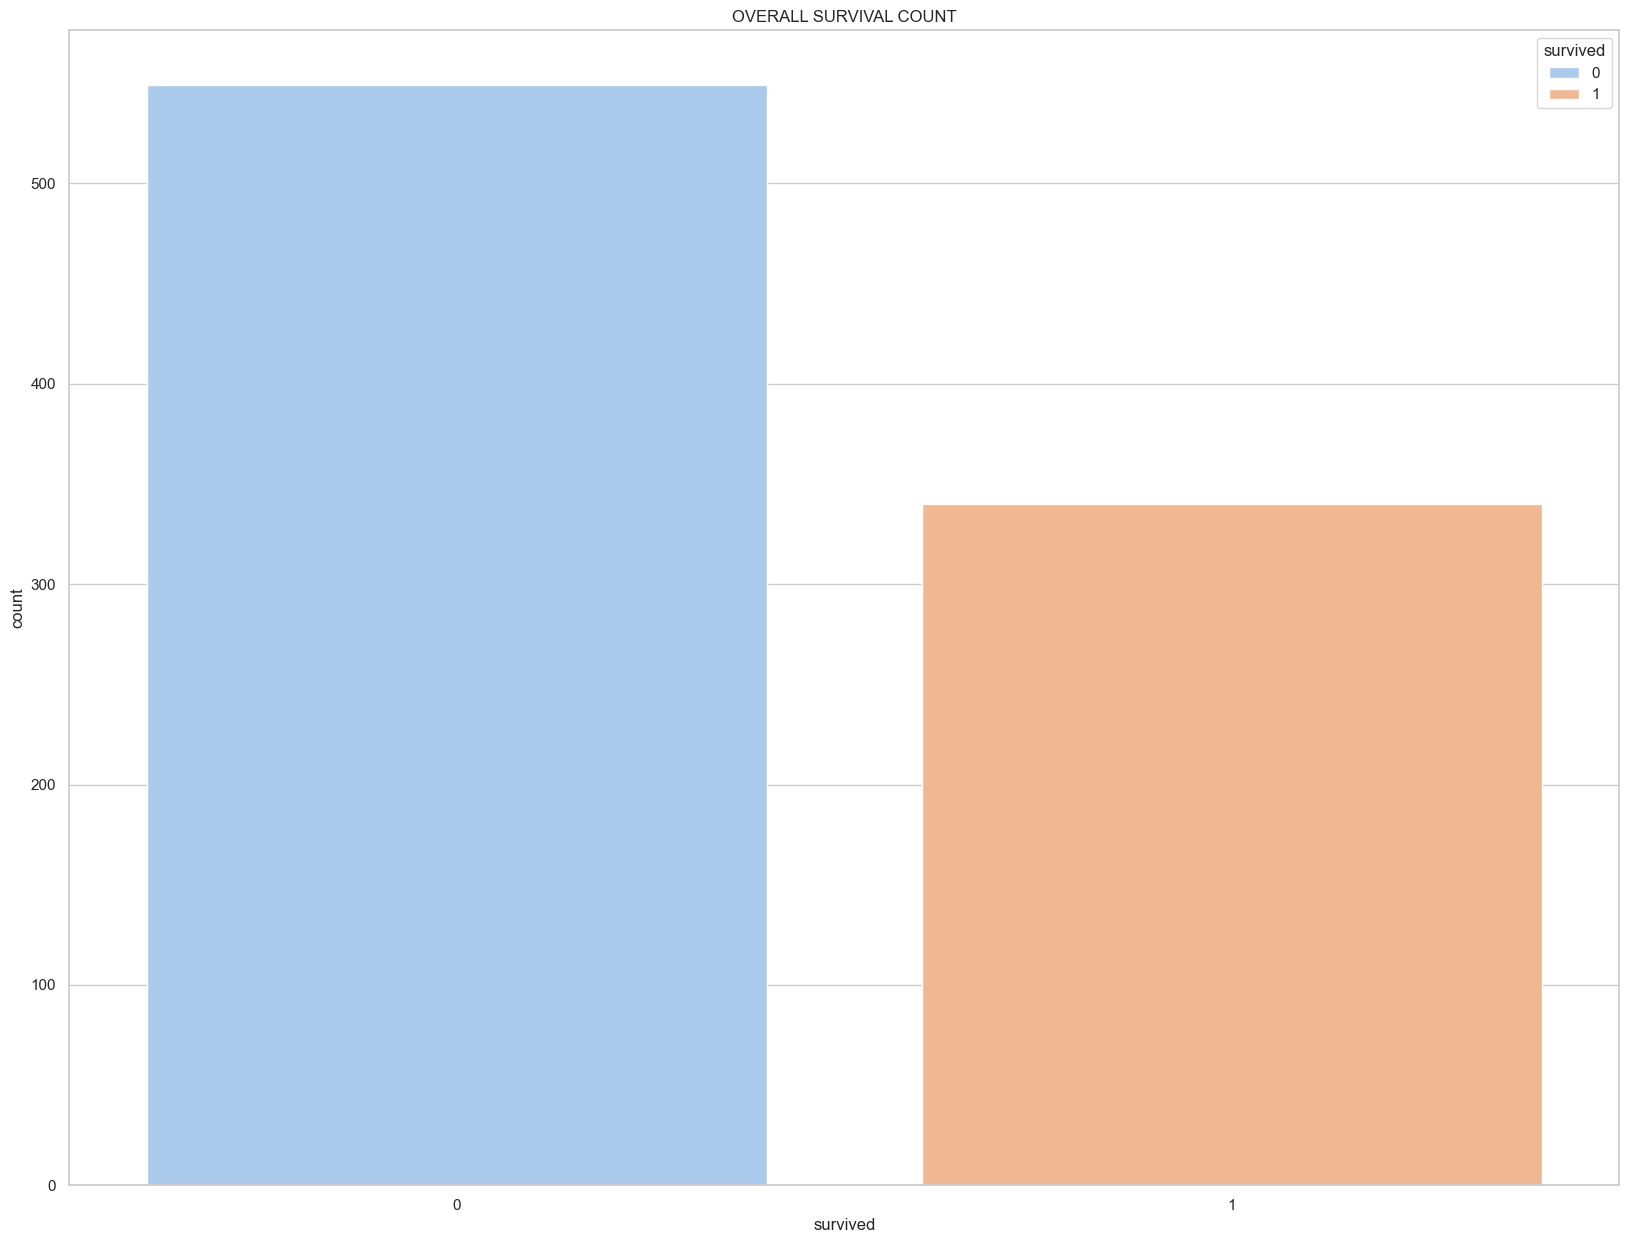

In [139]:
# Set the theme for the rest of the plots

sns.set_theme(style="whitegrid")

#plot raw counts of survived (0 = Died , 1 = Survived)
print("0 == people died || 1 == people survived")
sns.countplot(data = titanic , x='survived' , hue= 'survived', palette= 'pastel')
plt.title('OVERALL SURVIVAL COUNT')
plt.show()


# ***`The Question: "Is it true that women were more likely to survive than men?"`***

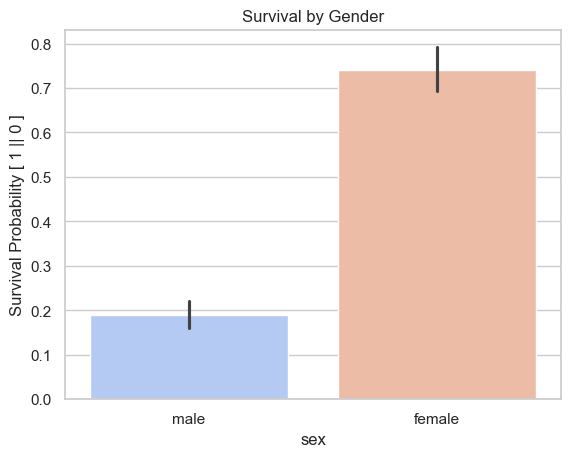

In [140]:
# Barplot automatically calculates the MEAN (percentage) of survival

sns.barplot(data= titanic, x='sex' ,hue = 'sex', y= 'survived', palette = 'coolwarm')
plt.title('Survival by Gender')
plt.ylabel('Survival Probability [ 1 || 0 ]')
plt.show()

# ***`The Question: "Did rich passengers (1st Class) have a better chance of survival than poor passengers (3rd Class)?"`***

In [141]:
#Can you combine Mission 2 and 3? Try adding hue='sex' to this plot to see Class AND Gender together.

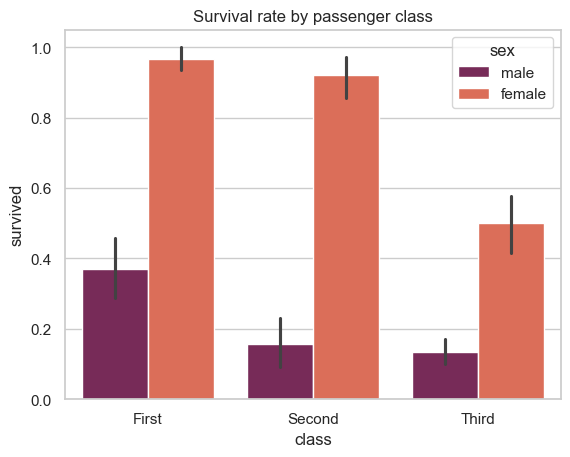

In [154]:
sns.barplot(data = titanic , x='class',y= 'survived' ,hue= 'sex', palette='rocket')
plt.title('Survival rate by passenger class')
plt.show()

# ***`The Question: "Did children have a higher survival rate? What about the elderly?"`***

In [143]:
# Compare the age distribution of those who died vs survived

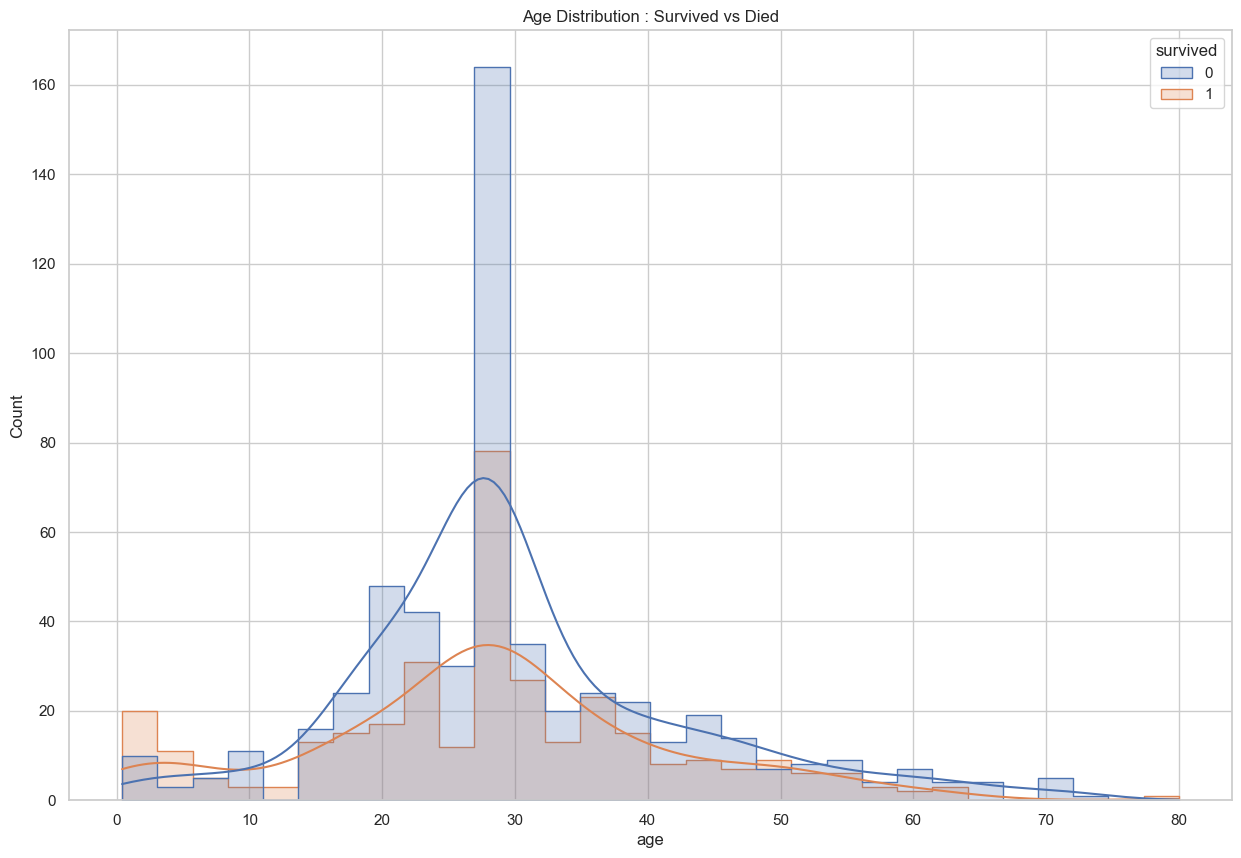

In [144]:
plt.figure(figsize=(15, 10))
sns.histplot(data=titanic , x='age' , hue='survived', kde=True, element='step')
plt.title("Age Distribution : Survived vs Died")
plt.show()

# ***`The Question: "Which single variable was most strongly correlated with survival?"`***

In [145]:
# 1. Calculate correlations (numeric only)

corr_matrix = titanic.corr(numeric_only = True)

<Figure size 2000x1500 with 0 Axes>

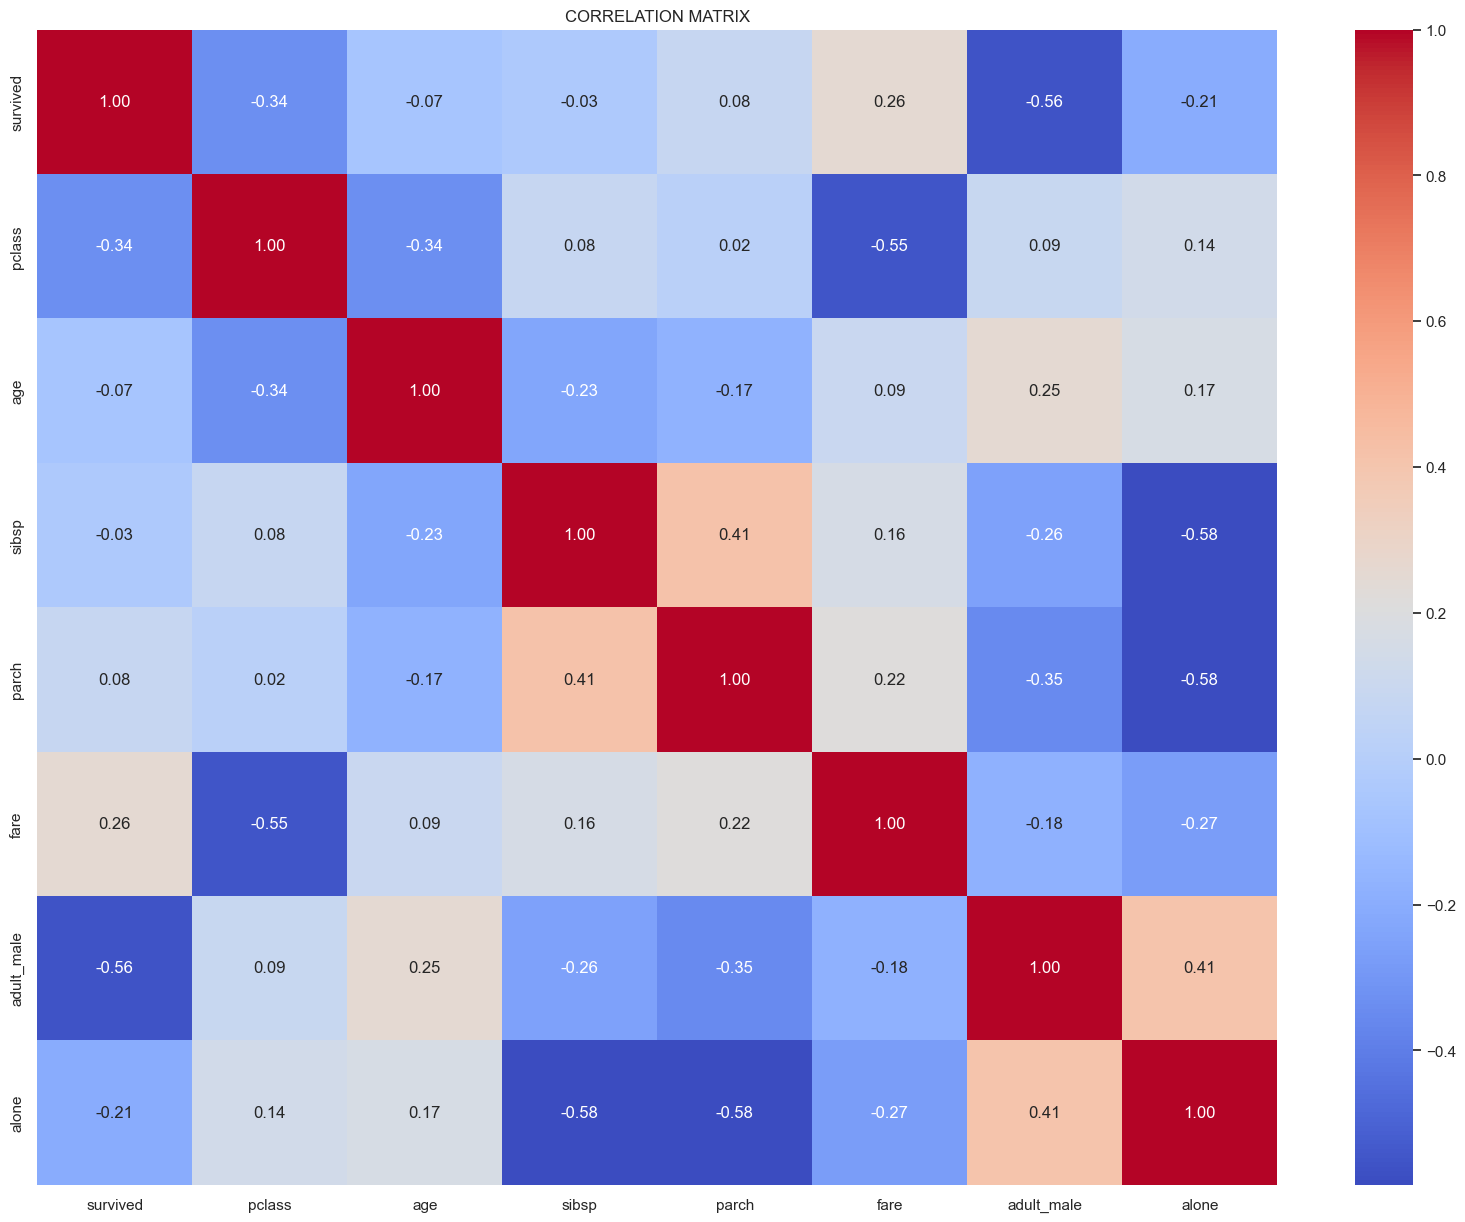

In [147]:
# 2. Plot heatmap

plt.figure(figsize =(20,15))
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm', fmt= '.2f')
plt.title("CORRELATION MATRIX")
plt.show()

## Executive Summary: Titanic Analysis 

* **Overall:** Most passengers [approx 550 Died].
* **Gender:** [Female] had a much higher chance of survival.
* **Class:** [1st] Class passengers were more likely to survive, indicating a wealth gap.
* **Age:** Babies and young children had a [Higher] survival rate than adults.
* **Conclusion:** The strongest predictors of survival were **Female** and **1st Class**. The "Women and Children First" protocol was clearly followed, but money also played a major role.